In [1]:
from fastbook import *
import os

In [2]:
urls = search_images_ddg('bird photos', max_images=1)
len(urls),urls[0]

(1, 'https://jooinn.com/images/beautiful-bird-3.jpg')

In [3]:
dest = Path('bird.jpg')
if not dest.exists(): download_url(urls[0], dest, show_progress=False)

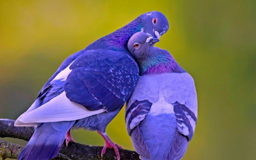

In [4]:
im = Image.open(dest)
im.to_thumb(256,256)

In [5]:
searches = 'forest', 'bird'
path = Path('bird_or_not')

if not path.exists():
    os.makedirs(path)
    for o in searches:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} photo')
        download_images(dest, urls=results[:200])
        resize_images(dest, max_size=400, dest=dest)

In [6]:
failed_download = verify_images(get_image_files(path))
failed_download.map(Path.unlink)

(#0) []

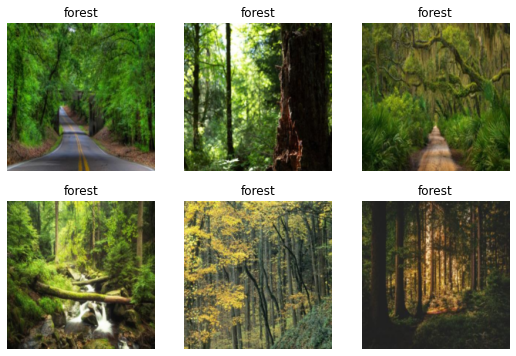

In [7]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method="squish")]
).dataloaders(path)

dls.show_batch(max_n=6)

In [8]:
learn = vision_learner(dls, weights=ResNet18_Weights.DEFAULT, metrics=error_rate)
learn.fine_tune(3)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.813339,1.155311,0.289474,00:51


epoch,train_loss,valid_loss,error_rate,time


In [ ]:
isBird,_,Probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {isBird}")
print(f"Probability it's a {isBird}: {Probs[0]:.4f}")

This is a: bird
Probability it's a bird: 1.0000
